In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from pandas_datareader import data
import keras 
from sklearn.preprocessing import MinMaxScaler


In [19]:
start = "2010-01-01"
end = "2022-10-31"
df = data.DataReader("TSLA",start,end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800
2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900
2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500


In [20]:
df.reset_index(inplace = True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3102,2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800
3103,2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900
3104,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500
3105,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800


In [21]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [22]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3102,2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800
3103,2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900
3104,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500
3105,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800
3106,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400


In [23]:
df = df.drop(['Adj Close','Date'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


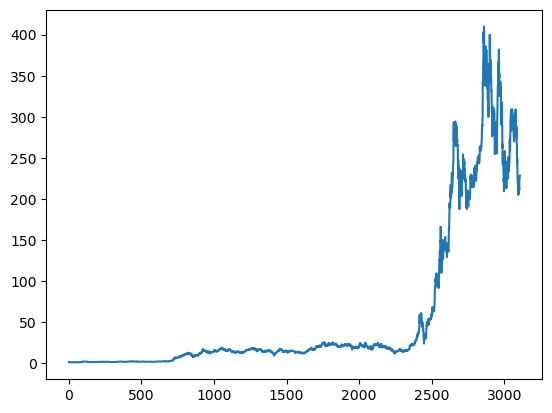

In [24]:
plt.plot(df.Close)

In [25]:
MA100 = df.Close.rolling(100).mean()
MA100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3102    261.128934
3103    260.769801
3104    260.671034
3105    260.539134
3106    260.435468
Name: Close, Length: 3107, dtype: float64

In [26]:
MA200 = df.Close.rolling(200).mean()
MA200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3102    280.894317
3103    280.294817
3104    279.654483
3105    279.005933
3106    278.304834
Name: Close, Length: 3107, dtype: float64

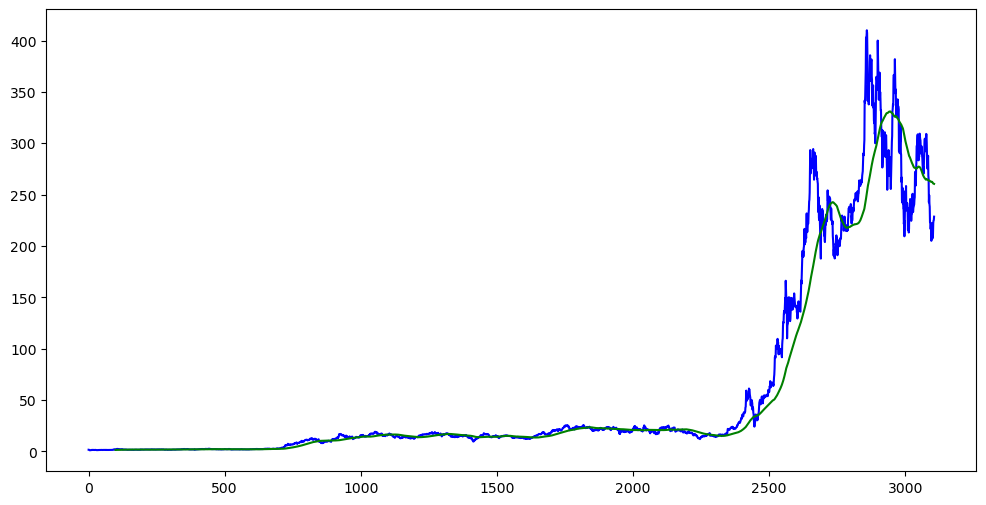

In [27]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,'b')
plt.plot(MA100,'g')
plt.show()

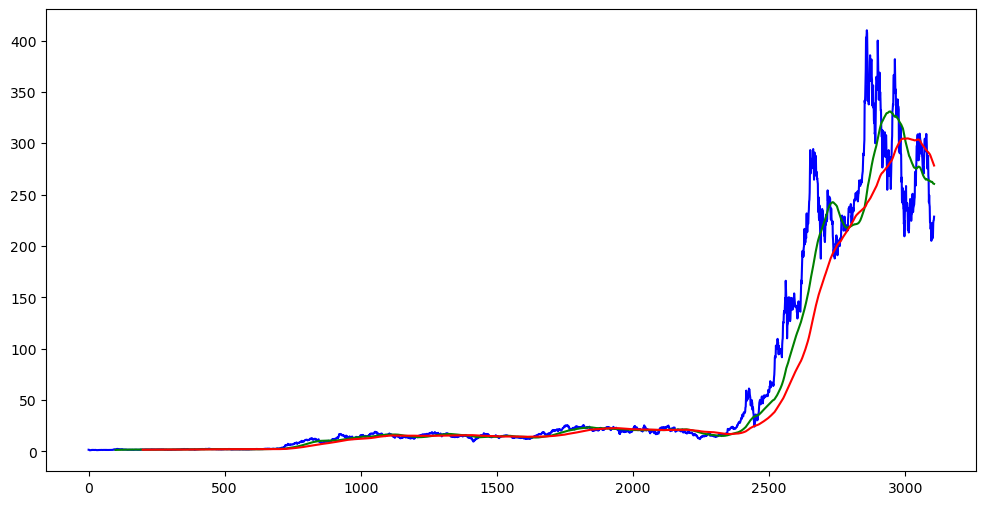

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,'b')
plt.plot(MA100,'g')
plt.plot(MA200,'r')
plt.show()

In [29]:
df.shape

(3107, 5)

In [30]:
train_data = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
train_data.shape

(2174, 1)

In [31]:
test_data = pd.DataFrame(df['Close'][int(len(df)*0.70):])
test_data.shape

(933, 1)

In [32]:
train_data.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [33]:
test_data.head()

,Close
2174,20.375999
2175,20.170668
2176,19.415333
2177,19.647333
2178,19.917999


In [34]:
scaler = MinMaxScaler(feature_range=(0,1))
train_data_array = scaler.fit_transform(train_data)
test_data_array = scaler.fit_transform(test_data)

In [35]:
train_data_array

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.79190135],
       [0.77998371],
       [0.79111589]])

In [36]:
test_data_array

array([[0.02121569],
       [0.02069984],
       [0.01880219],
       [0.01938505],
       [0.02006505],
       [0.01991264],
       [0.02273984],
       [0.02360072],
       [0.01939845],
       [0.01781904],
       [0.0163418 ],
       [0.01629155],
       [0.01635017],
       [0.01761471],
       [0.01875027],
       [0.01748407],
       [0.018422  ],
       [0.01858949],
       [0.01615588],
       [0.01516101],
       [0.01482268],
       [0.01584938],
       [0.01591973],
       [0.01433026],
       [0.01364189],
       [0.01487293],
       [0.01605539],
       [0.01669017],
       [0.01689786],
       [0.01845885],
       [0.01790613],
       [0.01889934],
       [0.0148746 ],
       [0.01607717],
       [0.01578239],
       [0.01563332],
       [0.0162614 ],
       [0.0149818 ],
       [0.0148612 ],
       [0.01464012],
       [0.01580919],
       [0.01545244],
       [0.01579244],
       [0.01403214],
       [0.01422475],
       [0.01334711],
       [0.01149972],
       [0.009

In [37]:
x_train = []
y_train = []

for i in range(100,train_data_array.shape[0]):
               x_train.append(train_data_array[i-100:i])
               y_train.append(train_data_array[i,0])
                              

In [38]:
x_train

[array([[0.02191227],
        [0.02174975],
        [0.01668473],
        [0.00920911],
        [0.00083967],
        [0.        ],
        [0.00449622],
        [0.0043337 ],
        [0.00338572],
        [0.00633802],
        [0.0109426 ],
        [0.01107802],
        [0.01310944],
        [0.01654932],
        [0.01218851],
        [0.01197184],
        [0.01408452],
        [0.01486999],
        [0.0139491 ],
        [0.01286567],
        [0.01332611],
        [0.01232397],
        [0.01121343],
        [0.01386785],
        [0.01665764],
        [0.01478873],
        [0.0125948 ],
        [0.01026545],
        [0.01029255],
        [0.00874867],
        [0.00568797],
        [0.00487541],
        [0.00682557],
        [0.00807152],
        [0.0090737 ],
        [0.00804442],
        [0.00809861],
        [0.00893824],
        [0.01172807],
        [0.00920911],
        [0.01110511],
        [0.01069883],
        [0.01056338],
        [0.01102386],
        [0.00996752],
        [0

In [39]:
y_train

[0.03816361820732184,
 0.04114302044167639,
 0.0476706585405845,
 0.05083967521385918,
 0.05327737587642675,
 0.052871092432665495,
 0.05018961976652887,
 0.052898156685147885,
 0.05024377733117778,
 0.044826674434255656,
 0.04249728890098589,
 0.039301217661790205,
 0.04268690333990602,
 0.044880831998904566,
 0.04401410754673313,
 0.04257853977780132,
 0.0399512731091205,
 0.03447996421474259,
 0.03737811072900102,
 0.04065547643453833,
 0.04214520176811905,
 0.043066083784939396,
 0.04458290243068662,
 0.04558504501088377,
 0.03870531977910882,
 0.026408448060885534,
 0.0287378335941553,
 0.03231313371119124,
 0.028981605597724336,
 0.02933369273059118,
 0.029306633321389483,
 0.029442046606134503,
 0.029875428205342974,
 0.03271941715495251,
 0.03369449548266726,
 0.03426329520990144,
 0.03022751533820983,
 0.03022751533820983,
 0.028223196274850718,
 0.026950188378918022,
 0.02665221522117389,
 0.022291451215343316,
 0.018472383938019026,
 0.0196099785492067,
 0.023537399702074302

In [40]:
x_train , y_train = np.array(x_train),np.array(y_train)

In [46]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [47]:
model = Sequential()
model.add(LSTM(units = 50 , activation ='relu', return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation ='relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80 , activation ='relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120 , activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [49]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
65/65 [==============================] - 26s 292ms/step - loss: 0.0495
Epoch 2/50
65/65 [==============================] - 19s 287ms/step - loss: 0.0108
Epoch 3/50
65/65 [==============================] - 19s 288ms/step - loss: 0.0099
Epoch 4/50
65/65 [==============================] - 19s 287ms/step - loss: 0.0095
Epoch 5/50
65/65 [==============================] - 19s 287ms/step - loss: 0.0089
Epoch 6/50
65/65 [==============================] - 19s 288ms/step - loss: 0.0088
Epoch 7/50
65/65 [==============================] - 19s 287ms/step - loss: 0.0085
Epoch 8/50
65/65 [==============================] - 19s 288ms/step - loss: 0.0078
Epoch 9/50
65/65 [==============================] - 19s 286ms/step - loss: 0.0075
Epoch 10/50
65/65 [==============================] - 19s 289ms/step - loss: 0.0074
Epoch 11/50
65/65 [==============================] - 19s 293ms/step - loss: 0.0073
Epoch 12/50
65/65 [==============================] - 19s 290ms/step - loss: 0.0073
Epoch 13/50
6

In [50]:
test_data.head()

,Close
2174,20.375999
2175,20.170668
2176,19.415333
2177,19.647333
2178,19.917999


In [51]:
past_100_days = train_data.tail(100)
final_df = past_100_days.append(test_data,ignore_index =True)

C:\Users\Bhavesh\AppData\Local\Temp\ipykernel_9580\231054052.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_data,ignore_index =True)


In [52]:
final_df.head()

,Close
0,19.978666
1,20.066000
2,20.638666
3,20.501333
4,17.651333


In [53]:
input_data = scaler.fit_transform(final_df)

In [54]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [55]:
x_test , y_test = np.array(x_test), np.array(y_test)

In [56]:
y_predicted = model.predict(x_test)

30/30 [==============================] - 4s 101ms/step


In [57]:
y_predicted.shape

(933, 1)

In [58]:
y_test.shape

(933,)

In [59]:
y_test

array([0.02121569, 0.02069984, 0.01880219, 0.01938505, 0.02006505,
       0.01991264, 0.02273984, 0.02360072, 0.01939845, 0.01781904,
       0.0163418 , 0.01629155, 0.01635017, 0.01761471, 0.01875027,
       0.01748407, 0.018422  , 0.01858949, 0.01615588, 0.01516101,
       0.01482268, 0.01584938, 0.01591973, 0.01433026, 0.01364189,
       0.01487293, 0.01605539, 0.01669017, 0.01689786, 0.01845885,
       0.01790613, 0.01889934, 0.0148746 , 0.01607717, 0.01578239,
       0.01563332, 0.0162614 , 0.0149818 , 0.0148612 , 0.01464012,
       0.01580919, 0.01545244, 0.01579244, 0.01403214, 0.01422475,
       0.01334711, 0.01149972, 0.0094078 , 0.010468  , 0.01000238,
       0.00921854, 0.01090849, 0.01273913, 0.01279105, 0.01140425,
       0.01103243, 0.01055342, 0.0101414 , 0.00804612, 0.00893381,
       0.00887351, 0.00826721, 0.00536967, 0.00442001, 0.00437311,
       0.00230464, 0.0027669 , 0.00195291, 0.00162966, 0.00182395,
       0.00154927, 0.00103675, 0.        , 0.00245035, 0.00295

In [60]:
y_predicted

array([[0.02774867],
       [0.02771759],
       [0.02769789],
       [0.02768725],
       [0.02768111],
       [0.02767554],
       [0.02766764],
       [0.02765504],
       [0.0276392 ],
       [0.02762377],
       [0.02760953],
       [0.02759439],
       [0.027574  ],
       [0.02754378],
       [0.0274992 ],
       [0.02743834],
       [0.02736242],
       [0.02727282],
       [0.02717274],
       [0.02706647],
       [0.02695617],
       [0.02684271],
       [0.02672587],
       [0.02660602],
       [0.02648473],
       [0.02636197],
       [0.02623698],
       [0.02611038],
       [0.02598426],
       [0.02586213],
       [0.02574763],
       [0.02564615],
       [0.0255619 ],
       [0.02549991],
       [0.02545986],
       [0.02544039],
       [0.02543896],
       [0.02545202],
       [0.02547655],
       [0.0255087 ],
       [0.0255444 ],
       [0.02557954],
       [0.02561164],
       [0.02563903],
       [0.02566138],
       [0.02567708],
       [0.0256851 ],
       [0.025

In [61]:
scaler.scale_

array([0.00251232])

In [62]:
scale_factor = 1/scaler.scale_

In [63]:
y_predicted = y_predicted *scale_factor
y_test = y_test * scale_factor

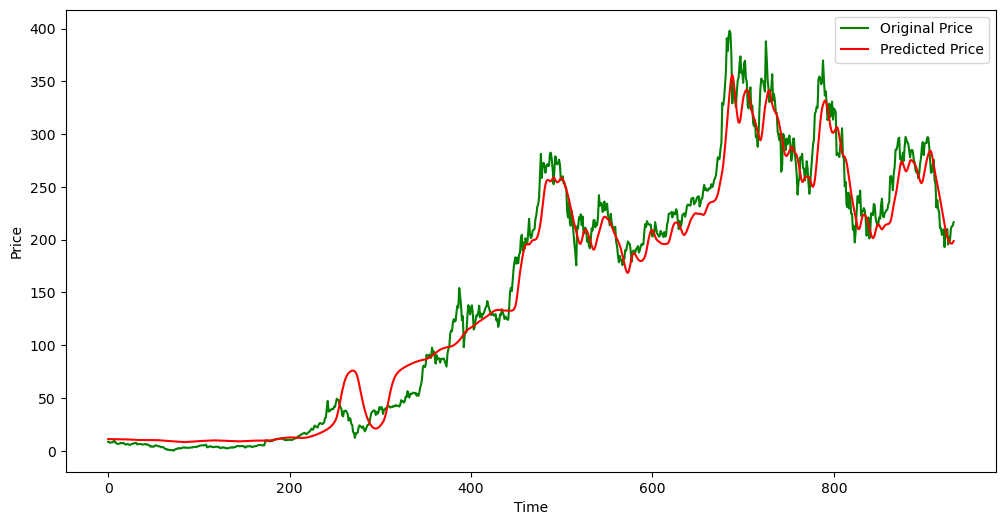

In [64]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'g', label = 'Original Price')
plt.plot(y_predicted,'r', label='Predicted Price')
plt.xlabel("Time")
plt.ylabel('Price')
plt.legend()
plt.show()
          

In [65]:
model.save('keras_model.h5')